<a href="https://colab.research.google.com/github/harsh194/machine_learning/blob/main/Apply_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import os
new_directory = '/content/drive/MyDrive/Harsh/Advanced Learning Algorithms/Week 3'
os.chdir(new_directory)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu, linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

from public_tests_a1 import *

tf.keras.backend.set_floatx('float64')
from assigment_utils import *

tf.autograph.set_verbosity(0)

In [24]:
X,y, x_ideal, y_ideal = gen_data(18,2,0.7)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 1)

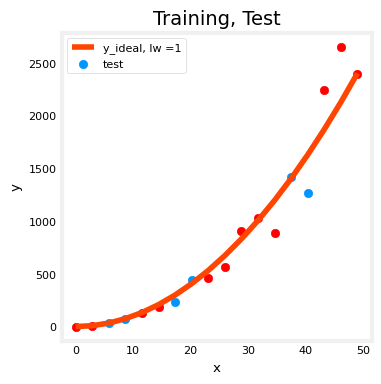

In [25]:
fig,ax = plt.subplots(1,1, figsize = (4,4))
ax.plot(x_ideal, y_ideal, "-", color = "orangered", label = "y_ideal, lw =1")
ax.set_title("Training, Test", fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red")
ax.scatter(X_test, y_test, color = dlc["dlblue"], label = "test")
ax.legend(loc = 'upper left')
plt.show()

In [26]:
def eval_mse(y, yhat):
    m = len(y)
    err = 0.0
    for i in range(m):
        err += (y[i] - yhat[i]) **2
    err/= 2*m
    return(err)

In [27]:
y_hat = np.array([2.4, 4.2])
y_tmp = np.array([2.3, 4.1])

test_eval_mse(eval_mse)

 All tests passed.


In [28]:
degree = 10
lmodel = lin_model(degree)
lmodel.fit(X_train, y_train)

yhat = lmodel.predict(X_train)
err_train = lmodel.mse(y_train, yhat)


In [29]:
err_train

58.007560352786506

In [30]:
yhat = lmodel.predict(X_test)
err_test = lmodel.mse(y_test, yhat)

In [31]:
err_test

171215.01148835945

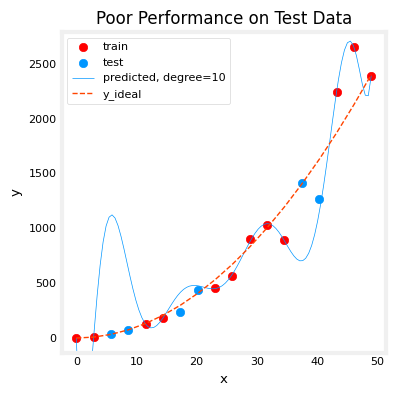

In [32]:
x = np.linspace(0, int(X.max()), 100)
y_pred = lmodel.predict(x).reshape(-1,1)

plt_train_test(X_train, y_train, X_test, y_test, x, y_pred, x_ideal, y_ideal, degree)

In [33]:
X,y, x_ideal, y_ideal = gen_data(40,5,0.7)
X_train, X_, y_train, y_ = train_test_split(X,y, test_size = 0.40, random_state = 1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_, test_size = 0.5, random_state = 1)
X_train.shape

(24,)

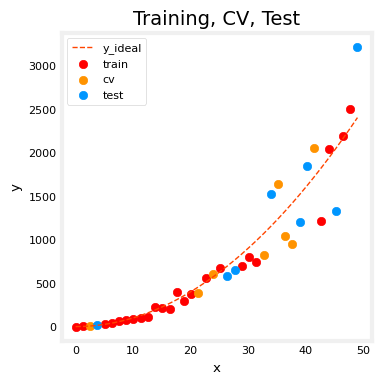

In [39]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label = "y_ideal", lw = 1)
ax.set_title("Training, CV, Test", fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red", label = "train")
ax.scatter(X_cv, y_cv, color = dlc["dlorange"], label = "cv")
ax.scatter(X_test, y_test, color = dlc["dlblue"], label = "test")
ax.legend(loc = 'upper left')
plt.show()

In [44]:
max_degree = 9
err_train = np.zeros(max_degree)
err_cv = np.zeros(max_degree)
x = np.linspace(0, int(X.max()), 100)
y_pred = np.zeros((100, max_degree))

for degree in range(max_degree):
    lmodel = lin_model(degree+1)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[degree] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[degree] = lmodel.mse(y_cv, yhat)
    y_pred[:, degree] = lmodel.predict(x)

optimal_degree = np.argmin(err_cv) + 1

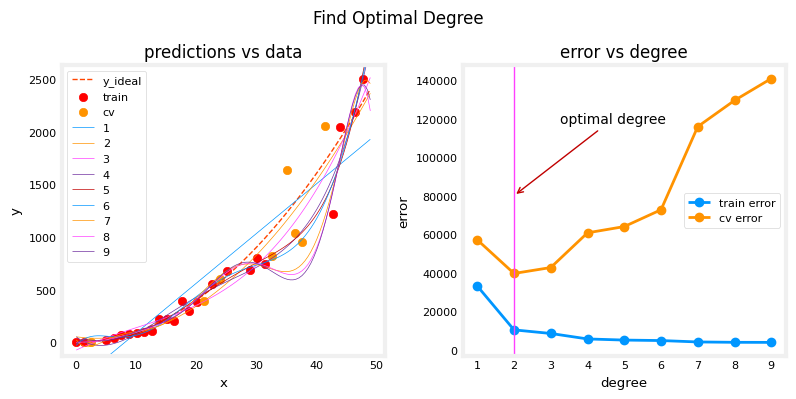

In [45]:
plt.close("all")
plt_optimal_degree(X_train, y_train, X_cv, y_cv, x, y_pred, x_ideal, y_ideal, err_train, err_cv, optimal_degree, max_degree)

In [50]:
lambda_range = np.array([0.0, 1e-6, 1e-5, 1e-4,1e-3,1e-2, 1e-1,1,10,100])
num_steps = len(lambda_range)
degree = 10
err_train = np.zeros(num_steps)
err_cv = np.zeros(num_steps)
x = np.linspace(0, int(X.max()), 100)
y_pred = np.zeros((100, num_steps))

for i in range(num_steps):
    lambda_ = lambda_range[i]
    lmodel = lin_model(degree, regularization = True, lambda_ = lambda_)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[i] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[i] = lmodel.mse(y_cv, yhat)
    y_pred[:,i] = lmodel.predict(x)

optimal_reg_idx = np.argmin(err_cv)


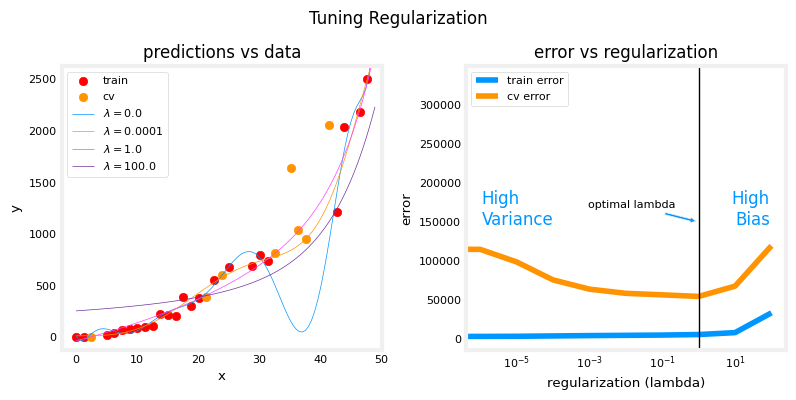

In [51]:
plt.close("all")
plt_tune_regularization(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, optimal_reg_idx, lambda_range)

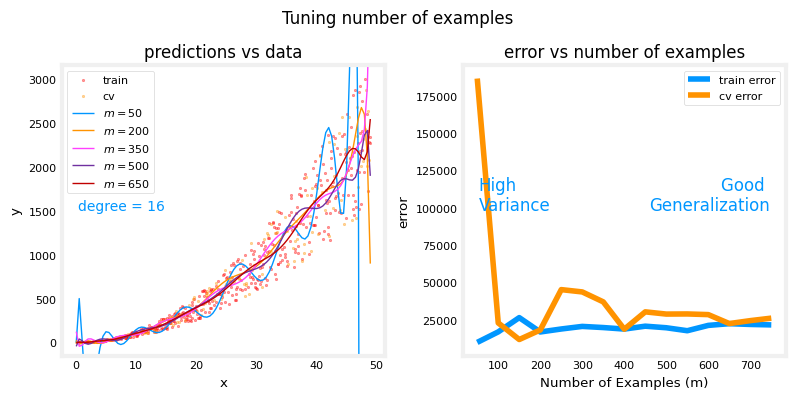

In [52]:
X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range,degree = tune_m()
plt_tune_m(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range, degree)

In [54]:
X,y, centers, classes, std = gen_blobs()

X_train, X_, y_train, y_ = train_test_split(X,y, test_size = 0.50, random_state =1)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size = 0.20, random_state= 1)

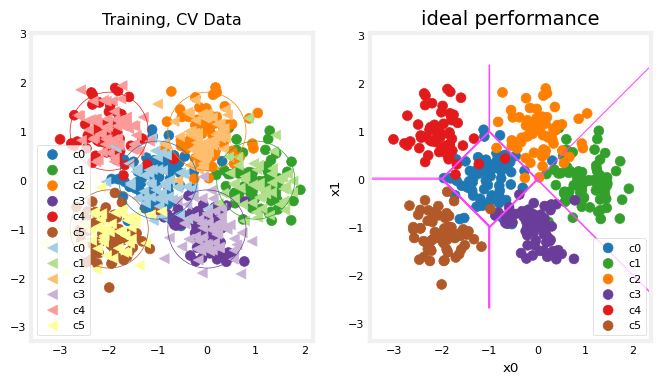

In [55]:
plt_train_eq_dist(X_train, y_train, classes, X_cv, y_cv, centers, std)